In [1]:
from urllib.request import Request, urlopen
import json
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
req = Request('https://thevirustracker.com/timeline/map-data.json',
              headers={'user-agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.149 Safari/537.36'})
with urlopen(req) as res:
    data = json.load(res)

In [3]:
df = pd.DataFrame(data['data'])
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%y')
df[['cases', 'deaths', 'recovered']] = df[['cases', 'deaths', 'recovered']].applymap(int)
df.sort_values(['countrycode', 'date'], inplace=True)
df

,countrycode,date,cases,deaths,recovered
0,AE,2020-01-29,4,0,0
1,AE,2020-01-30,4,0,0
2,AE,2020-01-31,4,0,0
3,AE,2020-02-01,4,0,0
4,AE,2020-02-02,5,0,0
...,...,...,...,...,...
4451,ZW,2020-03-26,3,1,0
3848,ZW,2020-03-27,3,1,0
3999,ZW,2020-03-28,5,1,0
4150,ZW,2020-03-29,7,1,0


In [4]:
df_country = df.set_index(['countrycode', 'date'])
df_country

cases  deaths  recovered
countrycode date                                
AE          2020-01-29      4       0          0
            2020-01-30      4       0          0
            2020-01-31      4       0          0
            2020-02-01      4       0          0
            2020-02-02      5       0          0
...                       ...     ...        ...
ZW          2020-03-26      3       1          0
            2020-03-27      3       1          0
            2020-03-28      5       1          0
            2020-03-29      7       1          0
            2020-03-30      7       1          0

[4455 rows x 3 columns]

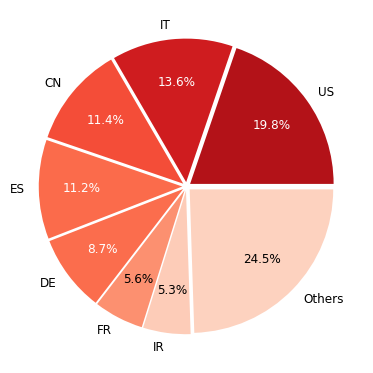

In [39]:
today = df.groupby('countrycode').last()
today.sort_values('cases', ascending=False, inplace=True)

n = 7
other = today[n:].sum()
other.name = 'Others'
today_top_n = today[:n].append(other)['cases']

fig, ax = plt.subplots(figsize=(16, 6.6))
explode = np.zeros(n+1)
explode[:] = 0.03
norm = mpl.colors.LogNorm(vmin=today_top_n.min()/1.5, vmax=today_top_n.max()*1.5)
colors = mpl.cm.get_cmap('Reds')(norm(today_top_n))
textprops = dict(fontsize='large', fontfamily='sans serif')
patches, texts, autotexts = ax.pie(today_top_n, labels=today_top_n.index,
                                   pctdistance=0.7, explode=explode,
                                   autopct='%.1f%%', textprops=textprops,
                                   colors=np.roll(colors, 1, axis=0))
for t, p in zip(autotexts, patches):
    if np.array(p.get_facecolor()).prod() < 0.2:
        t.set_color('w')
plt.show()

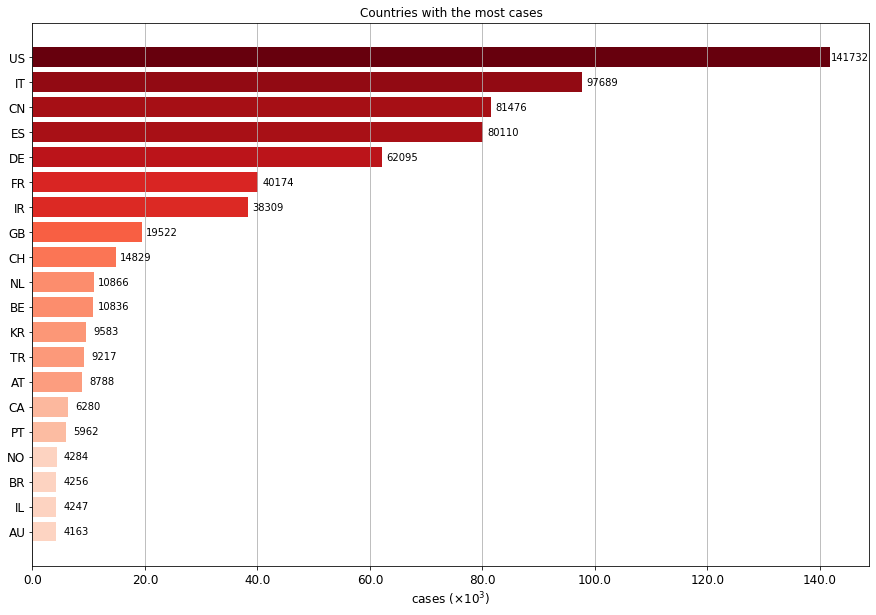

In [10]:
def label(rects):
    for rect in rects:
        width = rect.get_width()
        height = rect.get_height()
        ax.annotate('{}'.format(width),
                    xy=(width, rect.get_y() + height / 2), xytext=(20, 0),
                    textcoords="offset points",ha='center', va='center')

n = 20
font_dict = dict(fontsize='large', fontfamily='sans serif')
today_top_n = today['cases'][:n]

fig, ax = plt.subplots(figsize=(15, 10))
color = mpl.cm.get_cmap('Reds')(mpl.colors.LogNorm(vmin=today_top_n.min()/2)(today_top_n))
rects = ax.barh(range(today_top_n.shape[0]), today_top_n, color=color)
label(rects)

ax.set_xlabel('cases ($\\times10^3$)', font_dict)
ax.set_xticklabels(ax.get_xticks() / 1e3, font_dict)
ax.set_yticks(range(n))
ax.set_yticklabels(today_top_n.index, font_dict)
ax.invert_yaxis()
ax.set_title('Countries with the most cases', font_dict)
ax.grid(True, axis='x')

plt.show()

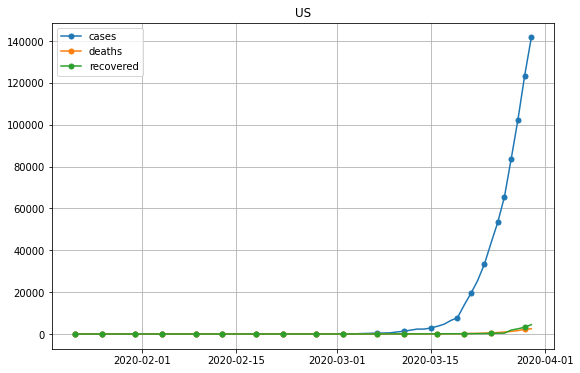

In [7]:
fig, ax = plt.subplots(figsize=(9, 6))
data = df_country.loc['US']
for label, content in data.iteritems():
    ax.plot(content, label=label, marker='o', markersize=5, markevery=0.05)
ax.set_title('US')
ax.grid()
ax.legend()